C:\Users\User\AppData\Local\Temp\ipykernel_10324\2238990631.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_df['ResourceID'][index]= category                #'Age group', 'Regions' and Auckland Region


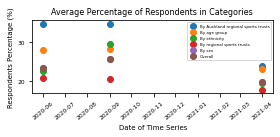

C:\Users\User\AppData\Local\Temp\ipykernel_10324\2238990631.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_df['ResourceID'][index]= category                #'Age group', 'Regions' and Auckland Region
C:\Users\User\AppData\Local\Temp\ipykernel_10324\2238990631.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trimmed_df['ResourceID'][index]= category                #'Age group', 'Regions' and Auckland Region
C:\Users\User\AppData\Local\Temp\ipykernel_10324\2238990631.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

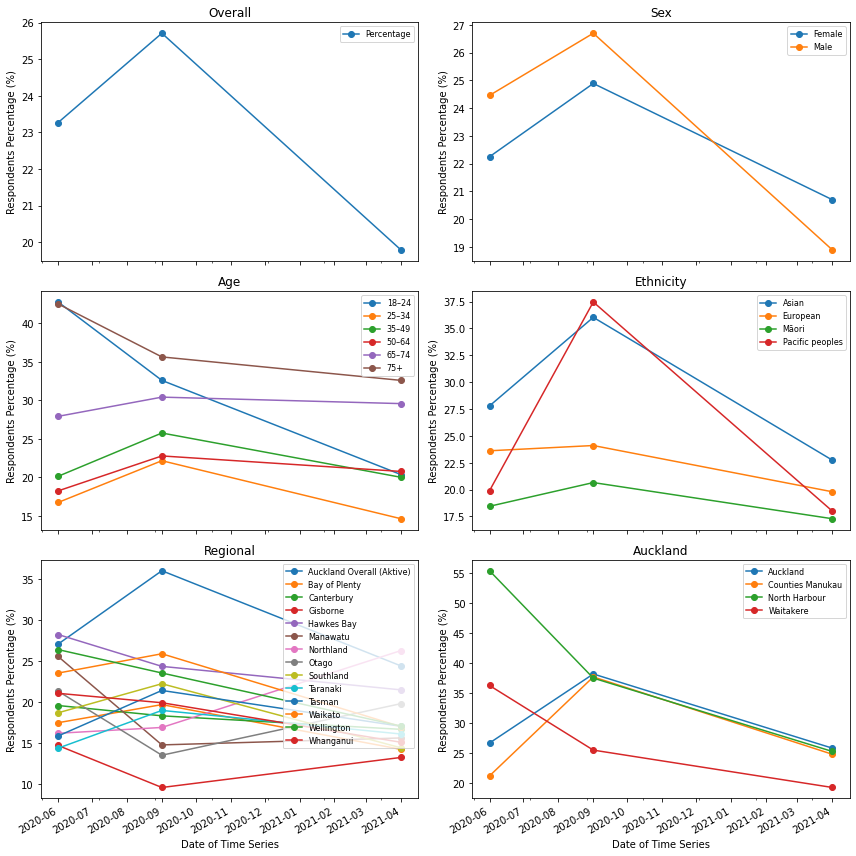

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from fpdf import FPDF
import re

def load_clean():
    '''This function loads and cleans the data before analysis'''
    useful_vars = []
    indicator_df = pd.read_excel(r'covid_19_data_Social_WorkingStudying_at_Homel.xlsx', sheet_name = 'data')#load data
    meta_df = pd.read_excel(r'covid_19_data_Social_WorkingStudying_at_Homel.xlsx', sheet_name = 'metadata')#loadmetadata
    
    nona_indicator_df = indicator_df.dropna(axis=1) #remove columns containing only missing variables
    
    for i in range(len(nona_indicator_df.columns)-3): # from the data frame with no missing values columns remove the  
        useful_vars.append(nona_indicator_df.columns[i]) # 3 columns to the right of the data frame as they contain strings 
                                                # of the same value ('%', 'percentage of respondents' & '0') which 
                                                # for data analysis
            
    trimmed_df = indicator_df.drop([col for col in indicator_df.columns if not (col in useful_vars)], axis = 1)
    # now from the data frame otained from loading the xsls file remove all columns whose names are not found in the
    #list of useful variables and call the new data frame trimmed_df
    
    trimmed_df['Period'] = pd.to_datetime(trimmed_df['Period']) #Convert the datatype of the string values of the 
                                                            #'Period' column to date type
    
    trimmed_df['Value'] = trimmed_df['Value'].round(2)#Round off to 2 decimal places the float values of the 'Value'
                                                    # column
    
    for resource, category in zip(meta_df['ResourceID'], meta_df['Var1']): #Rename the values in the 'ResourceID'
        for index, row in indicator_df.iterrows():                       #Change them to categories the data is 
            if trimmed_df['ResourceID'][index] == resource:              #classified into ('Overall', 'Sex', 
                trimmed_df['ResourceID'][index]= category                #'Age group', 'Regions' and Auckland Region
                                                                     #found in the metadata)
    #Change the names of the variables to some more meaningful names
    renamed_df = trimmed_df.rename(columns={'ResourceID': 'Category', 'Label1': 'Subcategory', 'Value' : 'Percentage'})
    
    return renamed_df, meta_df

def plot_funct():
    '''This function plots and visualises the data being analysed'''
    
    title_list =[]
    category_dict = {}
    df_list = []
    
    #Plotting the average percentage of respondents that fall into six categories ('Overall, 'Sex', 'Age group', 
    # 'Regions' and 'Auckland region') 
    reshaped_df = load_clean()[0].pivot_table(index='Period', columns='Category', values= 'Percentage', 
                                              aggfunc='mean')
    plt.figure(figsize=(4,2))
    plt.plot(reshaped_df, 'o')
    plt.xticks(rotation = 40, size = 6)
    plt.yticks(size = 6)
    plt.legend(reshaped_df.columns, fontsize = 4)
    rcParams.update({'figure.autolayout': True})
    plt.title('Average Percentage of Respondents in Categories ', size = 8)
    plt.ylabel('Respondents Percentage (%)', size = 7)
    plt.xlabel('Date of Time Series', size = 7)
    plt.savefig(fname = 'Categories.png', dpi = 300, bbox_inches = 'tight')
    plt.show()
    
    #This part is used to drill into each of the 6 categories to see how the results of the sub-categories compare
    for resource, category in zip(load_clean()[1]['ResourceID'], load_clean()[1]['Var1']):
        name= category.split(" ")
    
        if len(name) <= 1:
            cat_name = name[0].capitalize()
        else:
            cat_name = name[1].capitalize()
        category_df = '{}_df'.format(cat_name)
    
        category_dict[category_df] = load_clean()[0][load_clean()[0]['Category'] == category]#Create a dictionary where category 
        title_list.append(cat_name)                                            #names are keys and category dataframes
                                                                               #are values and append category names to
                                                                                #titles list
    for (key, value) in category_dict.items():
        sub_cat_df = value.drop('Category', axis = 1).pivot_table(index='Period', columns='Subcategory',
                                                                  values= 'Percentage',  aggfunc='mean')
        df_list.append(sub_cat_df)               #Even though the 'agg_funct' is used the values returned are still raw data percentages
    
    columns_no = 2
    rows_no = 3
    figure, axes = plt.subplots(rows_no, columns_no, figsize=(12,12), sharex=True) #Plot curves for the categories 
   
    count = 0
    for i in range(rows_no):
        for j in range(columns_no):
            df_list[count].plot(ax=axes[i, j], marker = 'o')
            axes[i, j].set_title('{0}'.format(title_list[count]))
            axes[i, j].legend(loc = 'upper right', fontsize = 8)
            count +=1
    for axes in axes.flat:
        axes.set(xlabel='Date of Time Series', ylabel= 'Respondents Percentage (%)')
    figure.savefig(fname = 'Subcategories.png', dpi = 300)
    
plot_funct()


def load_txt():
    '''This function loads a txt file that is incoeporated into the report'''
    
    filename = 'Report.txt'
    with open(filename, 'r') as file:
        text_dat = file.readlines()
    head_lst = []
    body_list = []
    
    for line in text_dat:
        text = line.rstrip().split(' ')
        if (len(text) <= 1 ) & (re.search("^\d", text[0]) is not None):
            head_lst.append(text[0][1:])
        elif len(text) >1:
            for word in text:
                body_list.append(word)

    parag = ' '.join(body_list)
    partitions_lst = parag.split('***')
    new_text =[]
    for text in partitions_lst:
        if len(text) > 1:
            new_text.append(text)

    return partitions_lst, head_lst      
        


def create_PdF():
    '''This function generates a report in the PDF format'''
    pdf= FPDF()
    heading = 'An Analysis of the Social Connection: Working/Studying at Home Indicator Data'
    pdf.add_page()
    pdf.set_font('Arial', size = 14)
    w = pdf.get_string_width(heading) 
    pdf.cell(0, 10, f'{heading}', 0, ln = 1, align = 'C')
        
    head_parag_dict = {}

    for word, heading in zip(load_txt()[0],load_txt()[1]):
        head_parag_dict[heading]= word
    
    i = 0 
    for key, value in head_parag_dict.items():
        pdf.ln(10)
        txt_1 ='{1}.{0}\n'.format(key, i+1)
        txt_2='{0}\n'.format(value)
       
        if 1 < i < 3:
            pdf.set_font("Arial", size = 12)
            pdf.multi_cell(0, 5, txt_1, 1, align ='C')
            pdf.ln(4)
            pdf.set_font("Arial", size = 9)
            pdf.multi_cell(0, 5, txt_2 , 1, align = 'C')
            pdf.add_page()
            pdf.image('Categories.png', x= 50, y= 5, w= 110, h= 60,)
            pdf.ln(10)
            pdf.image('Subcategories.png', x= 25 , y= 63, w= 158, h= 176)
        elif i > 2:
            pdf.ln(212)
            pdf.set_font("Arial", size = 12)
            pdf.multi_cell(0, 5, txt_1, 1, align ='C')
            pdf.ln(2)
            pdf.set_font("Arial", size = 9)
            pdf.multi_cell(0, 5, txt_2 , 1, align = 'C')
        else:
            pdf.set_font("Arial", size = 12)
            pdf.multi_cell(0, 5, txt_1, 1, align ='C')
            pdf.ln(4)
            pdf.set_font("Arial", size = 9)
            pdf.multi_cell(0, 5, txt_2 , 1, align = 'C')
        i += 1
    
        
    pdf.output('Report.pdf', 'F') 

if __name__ == '__main__':
    create_PdF()
